# Photometry with SourceExtractor

- For the first part of the exercise, use sextractor to carry out photometry on the combined Johnson V and Sloan r images. Details are found in the Observational Astronomy notes.

Assuming that photometry is available for the two images, we are now ready to examine it and make a colour-magnitude diagram of the instrumental magnitudes.

Output from sextractor (and many other codes) can be read with the astropy.io.ascii package. For a sextractor catalogue called 'V.cat', this works as follows:

In [24]:
#Getting the gain for the sextractor config file.
from astropy.io import fits
data, hdr = fits.getdata("science1Vf.fits", header=True)
print("GAIN parameter should be {}".format(hdr["EGAIN"]*10))

GAIN parameter should be 13.600000000000001


In [25]:
import astropy.io.ascii as asc
import os
os.system("sex Vfinal.fits -CATALOG_NAME V.cat")
os.system("sex Vfinal.fits,rfinal.fits -CATALOG_NAME r.cat")


> 
----- SExtractor 2.19.5 started on 2023-03-15 at 12:41:03 with 1 thread

> Setting catalog parameters
> Initializing check-image(s)
> Initializing catalog
> Looking for Vfinal.fits
----- Measuring from: Vfinal.fits
      "Unnamed" / no ext. header / 2184x1472 / 64 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  100
> Setting up background map at line:  200
> Setting up background map at line:  300
> Setting up background map at line:  400
> Setting up background map at line:  500
> Setting up background map at line:  600
> Setting up background map at line:  700
> Setting up background map at line:  800
> Setting up background map at line:  900
> Setting up background map at line: 1000
> Setting up background map at line: 1100
> Setting up background map at line: 1200
> Setting up background map at line: 1300
> Setting up background map at line: 1400
> Filtering background map(s)
> Computing background d-map
> Computing b

0

The asc.read() function returns an object of the class Table. Just printing the Vdata object will produce a neat listing of the data:

In [26]:
print(Vdata)

NUMBER  X_IMAGE   Y_IMAGE  A_IMAGE B_IMAGE MAG_APER MAGERR_APER
          pix       pix      pix     pix     mag        mag    
------ --------- --------- ------- ------- -------- -----------
     1  562.5654    2.3836   1.056   0.486  -2.9238      1.2256
     2  869.5165    2.3184   0.782   0.421  -2.3301      2.0996
     3 1909.5435    2.3239    1.02   0.578  -4.0281      0.4414
     4 1277.2362    2.2632   0.831   0.497  -4.3814       0.318
     5    66.057    4.6332   1.319   0.419  -4.2315      0.3833
     6  743.2001    2.7806   0.975   0.348  -3.8116      0.5592
     7  930.5846     2.872   0.818   0.419  -3.1837      0.9983
     8 1255.5529    3.4046   0.975   0.528  -3.2347      0.9564
     9 1509.0598    2.8142   1.118   0.475  -3.9846      0.4781
    10 1798.7997    3.3661   0.822   0.433  -3.7466      0.5978
   ...       ...       ...     ...     ...      ...         ...
 21006 1758.5479 1393.2137   1.504   0.487  -4.2443      0.3788
 21007  665.8768  1446.817   1.821   0.6

and the individual columns can be accessed by specifying the column name in brackets (same syntax as for a Python dict structure):

In [27]:
print(Vdata['MAG_APER'])

MAG_APER
  mag   
--------
 -2.9238
 -2.3301
 -4.0281
 -4.3814
 -4.2315
 -3.8116
 -3.1837
 -3.2347
 -3.9846
 -3.7466
     ...
 -4.2443
 -4.5808
 -4.4242
 -4.0649
 -3.5252
 -2.7757
 -3.7919
 -4.1787
 -4.1787
 -3.3835
Length = 21015 rows


- Read the sextractor photometry into Python and make a plot of the (V-r, V) colour-magnitude diagram. 

In [28]:
import astropy.io.ascii as asc

# Read the data

Vdata = asc.read('V.cat')
rdata = asc.read('r.cat')


Text(0, 0.5, 'V')

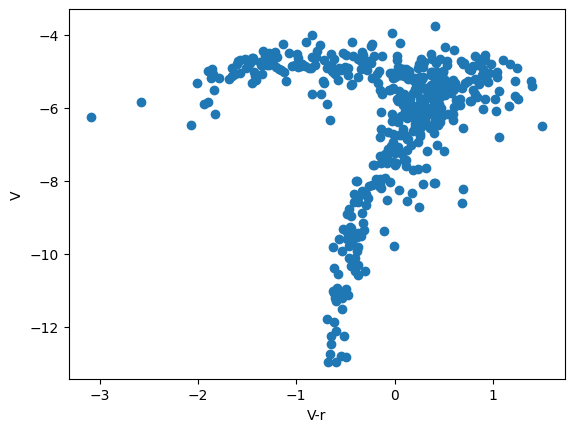

In [29]:
import matplotlib.pyplot as plt

# Now make the plot. Set the x- and y limits, add labels to the axes
V_r = []
V = []
for i in range(len(Vdata)):
    if Vdata[i]["MAGERR_APER"] > 1 or rdata[i]["MAGERR_APER"] > 1:
        continue # I had quite a lot of really inaccurate data, this gets rid of it
    V_r.append(Vdata[i]["MAG_APER"]-rdata[i]["MAG_APER"])
    V.append(Vdata[i]["MAG_APER"])

plt.scatter(V_r, V)
plt.xlim()
plt.ylim()
plt.xlabel("V-r")
plt.ylabel("V")

It is clear just from looking at the images that stars are not uniformly distributed - stars belonging to M37 are concentrated roughly (though not exactly) around the centre. It is often useful to compare CMDs for the central regions of a cluster with those further out. That way, we can try to assess whether certain CMD features are dominated by cluster stars, or whether there are significant contributions from the surrounding field.

- Roughly where are the centre coordinates of M37 located?
- Modify the CMD plot such that stars within 500 pixels of the centre are plotted with one colour (say, red) and stars further out with another. Do you see any differences?

Text(0, 0.5, 'V')

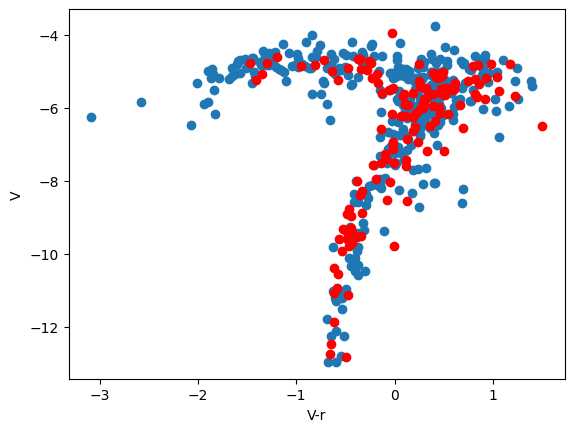

In [30]:
import numpy as np

center = np.array([931, 542]) #Found by guessing that the brightest star is somewhere around the center of M37 (also checked that this roughly matched just looking at all the stars and pointing at the part that looked like it had the most stars)

V_r_center = []
V_center = []
V_r = []
V = []
for i in range(len(Vdata)):
    if Vdata[i]["MAGERR_APER"] > 1 or rdata[i]["MAGERR_APER"] > 1:
        continue # I had quite a lot of really inaccurate data, this gets rid of it
    coords = np.array([Vdata[i]["X_IMAGE"], Vdata[i]["Y_IMAGE"]])
    if np.linalg.norm(center - coords) > 500:
        V_r.append(Vdata[i]["MAG_APER"]-rdata[i]["MAG_APER"])
        V.append(Vdata[i]["MAG_APER"])
    else:
        V_r_center.append(Vdata[i]["MAG_APER"]-rdata[i]["MAG_APER"])
        V_center.append(Vdata[i]["MAG_APER"])

# Define an array with distances of the stars to the centre:
# d_centre = ...
# wr = np.where(d_centre < 500)

# Now make the plot as before, but plot the stars closer to 
# the centre with a different colour.
plt.scatter(V_r, V)
plt.scatter(V_r_center, V_center, color="red")

plt.xlim()
plt.ylim()
plt.xlabel("V-r")
plt.ylabel("V")

- What about elongated sources (i.e., potential blends?) Try plotting sources with A IMAGE > 7 (see the notes for Observational Astronomy) with another colour (e.g. blue). Do we need to worry about them?

0.008547008547008548


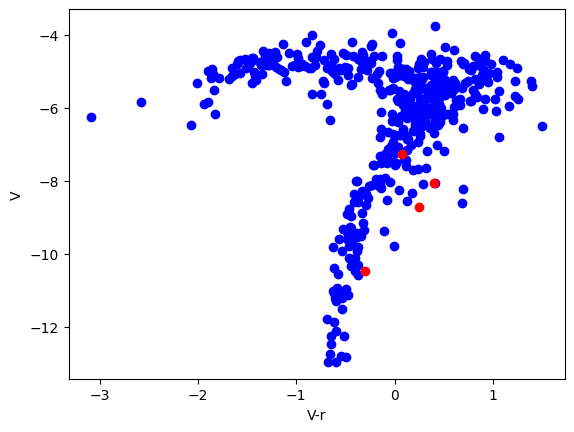

In [31]:
import numpy as np

center = np.array([931, 542]) #Found by guessing that the brightest star is somewhere around the center of M37 (also checked that this roughly matched just looking at all the stars and pointing at the part that looked like it had the most stars)

V_r_blend = []
V_blend = []
V_r = []
V = []
for i in range(len(Vdata)):
    if Vdata[i]["MAGERR_APER"] > 1 or rdata[i]["MAGERR_APER"] > 1:
        continue # I had quite a lot of really inaccurate data, this gets rid of it
    coords = np.array([Vdata[i]["X_IMAGE"], Vdata[i]["Y_IMAGE"]])
    if Vdata[i]["A_IMAGE"] > 7:
        V_r_blend.append(Vdata[i]["MAG_APER"]-rdata[i]["MAG_APER"])
        V_blend.append(Vdata[i]["MAG_APER"])
    else:
        V_r.append(Vdata[i]["MAG_APER"]-rdata[i]["MAG_APER"])
        V.append(Vdata[i]["MAG_APER"])


# Now make the plot as before, but plot the stars closer to 
# the centre with a different colour.
plt.scatter(V_r, V, color="blue")
plt.scatter(V_r_blend, V_blend, color="red")

plt.xlim()
plt.ylim()
plt.xlabel("V-r")
plt.ylabel("V")

print(len(V_blend)/len(V))

In [12]:
#Script used to determine FWHM of the data
import astropy.io.fits as fits
import numpy as np
import imexam
import os
import time

#viewer = imexam.connect(path='/vol/cursus/ObsAstro/bin/ds9')
#time.sleep(40)
#viewer.load_fits("Vfinal.fits")
#viewer.zoomtofit()
#viewer.imexam()

values = [9.82, 9.84, 10.23, 10.07, 10.20, 9.83, 10.01, 10.38, 10.08, 9.45]
FWHM = sum(values)/len(values)
print(FWHM)


Ginga not installed, use other viewer, or no viewer
9.991


The potentially blended stars make up just over 5% of my dataset (assuming that a threshold of 7 is accurate), which is significant.

## Hand in

- Your estimates of the FWHM of the stellar images in the V and r images (20/100 pts)
- The relevant parameters used for the photometry and background determination (you can fill this into the markdown field below) (20/100 pts)
- Output from this notebook, including the three CMDs: full CCD field (20/100 pts), stars in the inner 500 pixels plotted with red (20/100 pts), stars with A_IMAGE > 7 plotted with blue (20/100 pts)

In [13]:
FWHM of the images:
9.991
Relevant sextractor parameters:
FILTER           N              # apply filter for detection (Y or N)?
GAIN             13.6            # detector gain in e-/ADU
BACK_SIZE        100             # Background mesh: <size> or <width>,<height>
CHECKIMAGE_TYPE  APERTURES        # can be NONE, BACKGROUND, BACKGROUND_RMS,

SyntaxError: invalid syntax (3509883381.py, line 1)